#### 1.Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

#### 2.Load the data

In [2]:
wine = pd.read_csv(r"C:\Users\ADMIN\Downloads\Wine_clust .csv")
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Exploratory Data Analysis

In [3]:
#Shape of data
wine.shape

(178, 13)

In [4]:
#Basic information about the data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
#Statistical Analysis
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
#Check for null values
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No null values

In [7]:
#Check for outliers

z_scr = stats.zscore(wine)
threshold = 2.5
outliers_mask = (z_scr>threshold)|(z_scr<-threshold)
outliers_df = pd.DataFrame(outliers_mask,columns=wine.columns)

outliers_count = outliers_df.sum()
print('Number of outliers in each columns :\n',outliers_count)

Number of outliers in each columns :
 Alcohol                 0
Malic_Acid              4
Ash                     3
Ash_Alcanity            4
Magnesium               4
Total_Phenols           1
Flavanoids              1
Nonflavanoid_Phenols    0
Proanthocyanins         2
Color_Intensity         2
Hue                     1
OD280                   0
Proline                 2
dtype: int64


<Axes: >

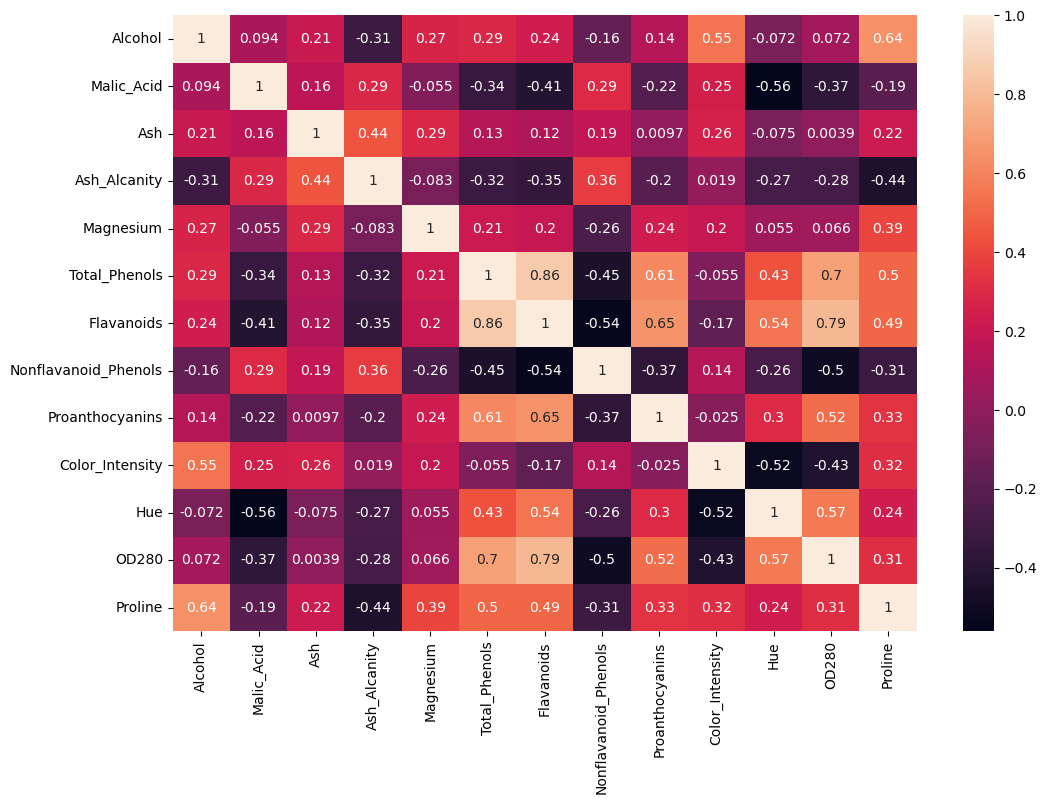

In [8]:
#Correlation Matrix

plt.figure(figsize=(12,8))
sns.heatmap(wine.corr(),annot=True)

#### Preprocessing

In [9]:
# Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine)
scaled_data = pd.DataFrame(scaled_data,columns = wine.columns)
scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### Building the models

#### 1.K-means Clustering

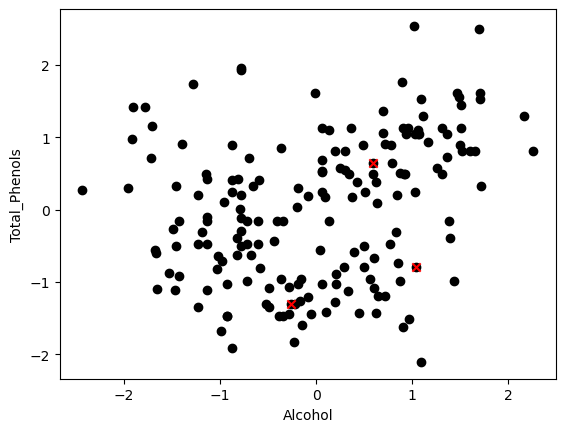

In [10]:
X = scaled_data

#Choosing the no. of clusters, K = 3
K = 3

#Select random observations as centroids
centroids = X.sample(n=K)

#Plot the clusters
plt.scatter(X['Alcohol'],X['Total_Phenols'],color = 'black')
plt.scatter(centroids['Alcohol'],centroids['Total_Phenols'],color = 'red',marker = 'x')
plt.xlabel('Alcohol')
plt.ylabel('Total_Phenols')
plt.show()

In [11]:
K = 3

#Fit a KMeans model
kmeans = KMeans(n_clusters=K,random_state=0)
X['Cluster'] = kmeans.fit_predict(X[['Alcohol','Total_Phenols']])
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


In [12]:
X['Cluster'].nunique()

3

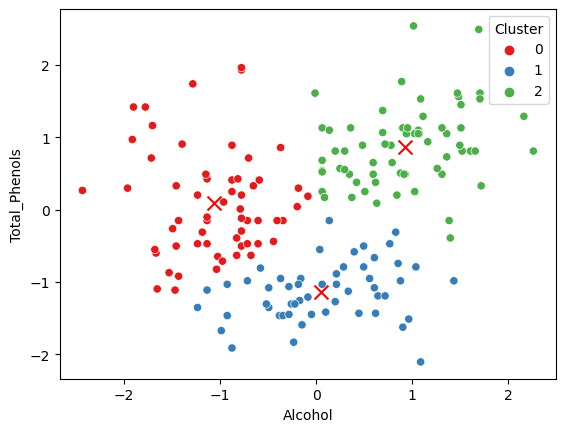

In [13]:
# Get cluster centroids
centroids = kmeans.cluster_centers_
#Plot the data points and centroids
sns.scatterplot(data = X,x = 'Alcohol',y = 'Total_Phenols',hue='Cluster',palette='Set1')
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='x',s=100)
plt.xlabel('Alcohol')
plt.ylabel('Total_Phenols')
plt.show()

In [14]:
#Get inertia 
inertia = kmeans.inertia_

#print of inertia

print('Inertia : ',inertia)

Inertia :  114.37290289645736


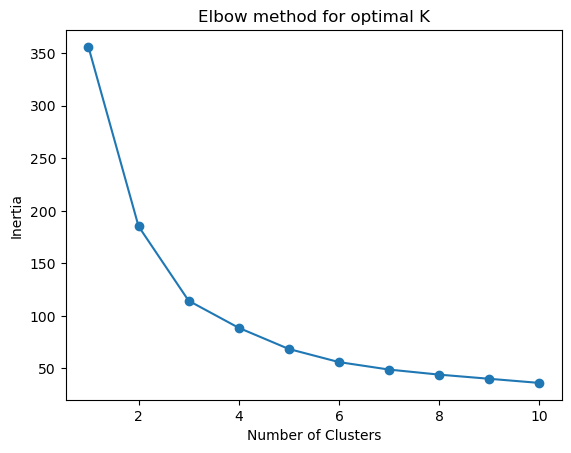

In [15]:
# Find the optimal clusters using the Elbow method

#Define a range of K values to test
K_range = range(1,11)
inertia_values = []

#Calculate the inertia for all values of K
for K in K_range:
    kmeans = KMeans(n_clusters=K,random_state=0)
    kmeans.fit(X[['Alcohol','Total_Phenols']])
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

#Plot the inertia values

plt.plot(K_range,inertia_values,marker = 'o')
plt.title('Elbow method for optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Therefore , here the optimal value of K is 3

In [16]:
# Using PCA 

In [17]:
#Train the model using the optimal value of cluster,3.

#Transform the data using PCA(Principle Component Analysis)
pca = PCA()
x = pca.fit_transform(X)

In [18]:
#Fit the model
kmeans = KMeans(n_clusters=3,random_state=0)
label = kmeans.fit_predict(x)
unique_labels = np.unique(label)

print('Unique Labels :',unique_labels)

Unique Labels : [0 1 2]


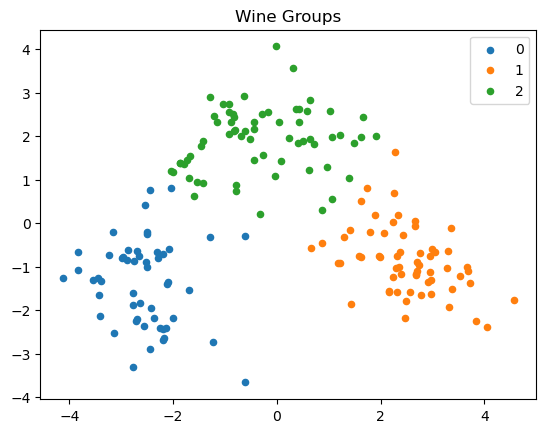

In [19]:
#Cluster visualisation
for i in unique_labels:
    plt.scatter(x[label==i,0],x[label==i,1],label=i,s = 20)
    
plt.legend()
plt.title('Wine Groups')
plt.show()

#### Evaluation of KMeans algorithm

In [20]:
#Evaluation using Silhouette score

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X[['Alcohol','Total_Phenols']],X['Cluster'])
print('Silhouette_score :', silhouette_avg)

Silhouette_score : 0.4473039565374367


#### 2. Agglomerative Clustering

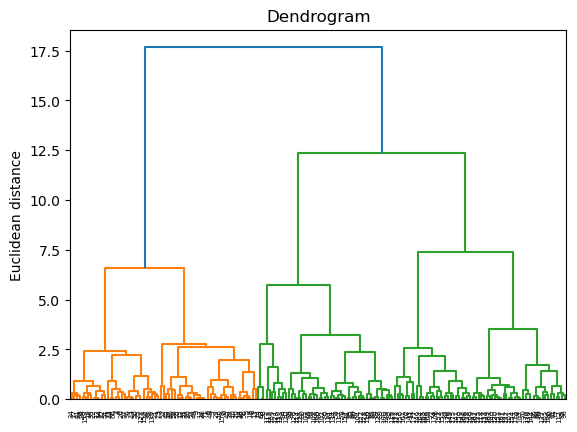

In [21]:
X = scaled_data.iloc[:,[0,5]]

#creating dendrogram for optimal no. of clusters

dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.ylabel("Euclidean distance")
plt.show()

From this,K = 3

In [22]:
#Fitting Agglomerative clustering

hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2,
       1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [23]:
X_np = X.values

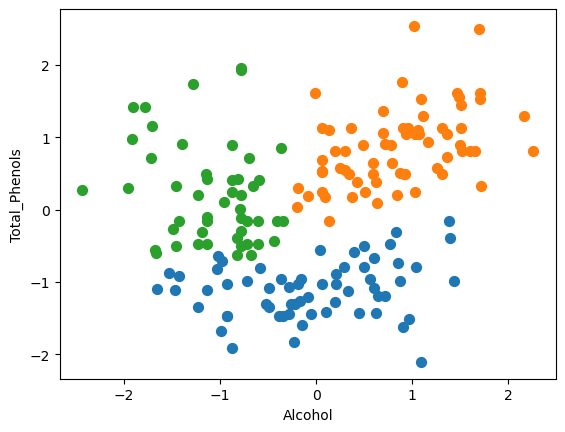

In [24]:
#visualizing the clusters

for cluster_label in range(3):
    plt.scatter(X_np[y_hc == cluster_label, 0],X_np[y_hc == cluster_label, 1],
                s=50, label=f'Cluster {cluster_label}')
    

plt.xlabel("Alcohol")
plt.ylabel("Total_Phenols")
plt.show()

#### Evaluating the Agglomerative Clustering

In [25]:
#Evaluation using Silhouette score

score = silhouette_score(X,y_hc)
print('Silhouette_score :', score)

Silhouette_score : 0.4176560236318957


#### 3.DBSCAN (Density Based Spatial Clustering of Applications with Noise)

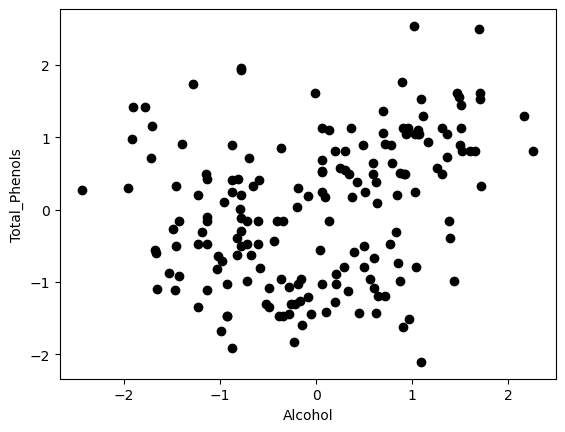

In [26]:
X = scaled_data.iloc[:,[0,5]]
X_np = X.values

plt.scatter(X_np[:,0],X_np[:,1],color = 'black')
plt.xlabel('Alcohol')
plt.ylabel('Total_Phenols')
plt.show()

In [27]:
dbscan = DBSCAN(eps=0.5,min_samples=15)
labels = dbscan.fit_predict(X)
np.unique(labels)

array([-1,  0,  1], dtype=int64)

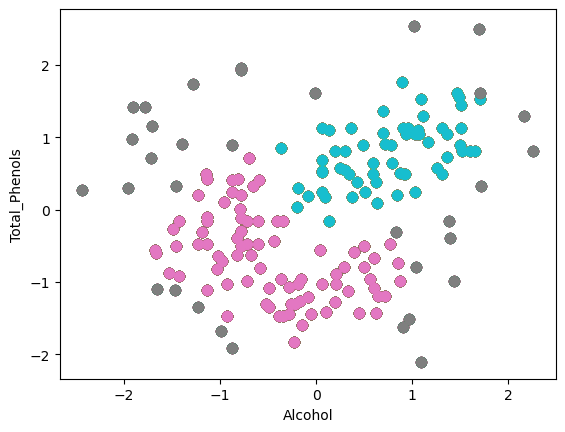

In [28]:
for i in labels:
    plt.scatter(X_np[labels==i,0],X_np[labels==i,1],s=50,label=f'Cluster {labels}')

plt.xlabel("Alcohol")
plt.ylabel("Total_Phenols")
plt.show()

Therefore the optimal clusters is 2(in colors Pink and Aqua Blue) and the rest data points are considered as noise.

#### Evaluation of DBSCAN

In [29]:
#Evaluation using Silhouette score

dbscan_score = silhouette_score(X,labels)
print('Silhouette_score :', dbscan_score)

Silhouette_score : 0.33410230779102934


#### Inference :

From all the three models,KMeans Clustering Algorithm has a Silhouette score :0.4473039565374367.So has a better performance compared to Agglomerative and DBSCAN algorithms.